# Práctica #5 - k Vecinos Más Cercanos

Profesor: Luis Norberto Zúñiga Morales, Universidad Iberoamericana Ciudad de México

Instrucciones:

- Realizar cada una de las actividades propuestas en este libro de Google Colab.
- Se puede realizar en equipos de 2 personas.
- Para la entrega de sus respuestas, es importante que la celda en cuestión se encuentre ejecutada para mostrar su resultados.
- Descargar su libro con terminación IPYNB y subirlo en la actividad correspondiente de Brigthspace.


## Carga y manipulación de datos

El objetivo de esta práctica es aplicar el algoritmo de kNN en un conjunto de datos usando la librería de scikit-learn. En esta ocasión, vamos a usar el dataset de Abalone disponible [aquí](https://archive.ics.uci.edu/dataset/1/abalone) para entrenar un modelo que permita determinar la edad de un [abulón](https://es.wikipedia.org/wiki/Haliotis).

Para determinar la edad de un abulón, se suele cortar su concha y contar el número de anillos en ella, lo cual es sumamente invasivo. Por lo tanto, un modelo de ML que use ciertas propiedades puede resultar más atractivo y menos perjudicial para el animal.

**Actividad 1** *(2 puntos)*: Acceder a la página del repositorio de datos e identificar:

1. Qué representa cada característica en los datos.
 - Nombre de la variable
 - Tipo de variable
 - Descripción
2. Número de instancias

*Escribir en una celda de texto abajo su respuesta.*

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

Primero cargamos nuestra información en un dataframe de Pandas. Cuando descargarmos el archivo, noten que hay dos archivos: uno con los nombres de los encabezados (abalone.names) y otro que tiene los datos (abalone.data). Vamos a utilizar éste último, considerando que la primera fila NO corresponde a encabezados:

In [ ]:
df = pd.read_csv('abalone.data', header=None)

Nunca está de más verificar si todo se cargó bien:

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Para añadir los nombres de las columnas, no podemos usar el archivo `abalon.names`, por lo que vamos a hacerlo manualmente, según los nombres dados en inglés:

In [ ]:
df.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Noten que la variable `Sex` es categórica, es decir, tiene un valor de categoría y no uno numérico. En estos casos, se pueden hacer dos cosas:

- Aplicar one-hot-encoding
- Tirarla de la tabla

Vamos a realizar un one-hot-encoding para la categoría `Sex` de dos maneras distintas. La primera es usando el método `get_dummies` de pandas, que genera un nuevo Dataframe:

In [ ]:
one_hot_df_dum = pd.get_dummies(df['Sex'], prefix='Sex')

In [ ]:
one_hot_df_dum.head()

,Sex_F,Sex_I,Sex_M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


La otra forma de hacerlo es con el método `OneHotEncoder()` de la librería scikit-learn:

In [ ]:
# create OneHotEncoder object
encoder = OneHotEncoder()

# fit and transform color column
one_hot_array = encoder.fit_transform(df[['Sex']]).toarray()

# create new dataframe from numpy array
one_hot_df_skl = pd.DataFrame(one_hot_array, columns=encoder.categories_)

In [ ]:
one_hot_df_skl.head()

,F,I,M
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


**Actividad 2** *(3 puntos)*: Utilicen cualquiera de los dos métodos para realizar el one-hot-encoding de la categoría `Sex` para generar las nuevas columnas y agregarlas al Dataframe que alberga todos los datos. Recuerden que deben tirar la columna original y *pegar* las nuevas columnas. Verificar que hicieron todo bien imprimiendo las primeras cinco filas del Dataframe nuevo.

In [ ]:
### su código aquí

# tiramos la columna Sex

# pegamos las nuevas columnas


Dependiendo del método que usen, debe obtener algo así:

In [ ]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


## Estadísticas descriptivas

Lo primero que vamos a hacer en esta sección es un histograma de la variable `Rings` para observar su distribución.

**Actividad 3** *(2 puntos)*: Realizar un histograma de la variable `Rings` con 15 intervalos y discutir lo que observan en una celda de texto abajo. Deben obtener algo así:

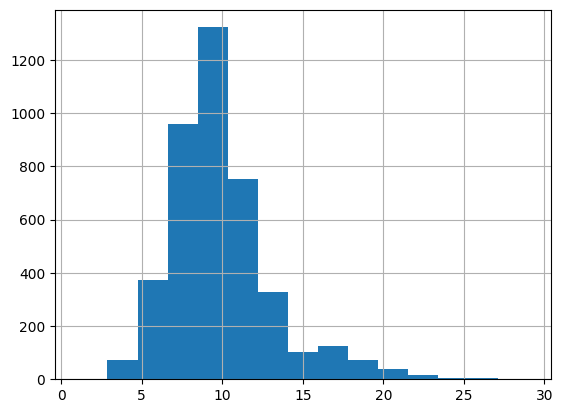

In [ ]:
# su código aquí


Otra estadística útil antes de empezar a procesar datos es determinar valores de correlación entre variables. La idea es que, si una variable puede ayudar a predecir otra, entonces tendrán un valor alto de correlación. En esta ocasión vamos a mantenerlo sencillo usando el método `corr` de Pandas para determinar lo anterior sobre la variable de interés, `Rings`:

In [ ]:
corr_matrix = df.corr()
corr_matrix['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Sex_F             0.250279
Sex_I            -0.436063
Sex_M             0.181831
Name: Rings, dtype: float64

**Actividad 4** *(2 puntos)*: ¿Cómo intrepretan los resultados anteriores? Escribir su respuesta en un celda de texto abajo.

## Entrenamiento del modelo usando scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Empezamos haciendo nuestro partición de entrenamiento y prueba usando el Dataframe con los datos:

In [ ]:
X = df.drop('Rings', axis=1).values
y = df['Rings'].values

# split train , test class_weight='balanced' decision_function_shape='ovo'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

Una vez realizada la partición de datos, inicializamos nuestro clasificador de kNN para regresión:

In [ ]:
knn_regr = KNeighborsRegressor(n_neighbors=2)

Ajustamos el modelo con nuestro datos:

In [ ]:
knn_regr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

Realizamos las predicción para evaluar el modelo:

In [ ]:
y_pred = knn_regr.predict(X_test)

Determinamos el error del modelo usando el ECM:

In [ ]:
ecm = mean_squared_error(y_test, y_pred)

In [ ]:
print(ecm)

6.182117224880383


In [ ]:
print('y_true: {}'.format(y_test[:5]))
print('y_pred: {}'.format(y_pred[:5]))

y_true: [ 9  8 16  9 14]
y_pred: [11.5  8.  12.  10.5 11.5]


In [ ]:
ecm = mean_squared_error(y_test, np.round(y_pred))

Un poco de redondeo para ver sus efectos:

In [ ]:
print('y_pred: {}'.format(np.round(y_pred[:5])))

y_pred: [12.  8. 12. 10. 12.]


In [ ]:
print(ecm)

6.287081339712919


**Actividad 5** *(4 puntos)*: Uno de los problemas con kNN es determinar el valor de $k$, lo cual se suele hacer con gráficas de error. Obtengan una gráfica de $k$ vs ECM para determinar el mejor valor de $k$ en este problema, donde $k\in [1,20]$, y mencionen dicho valor de $k$ según su gráfica.

In [ ]:
# so código aquí

**Actividad 6** *(6 puntos)*: Una vez obtenido el *mejor* parámetro de $k$ para kNN, entrenen el modelo (usando las mismas particiones de entrenamiento y prueba generadas en el código en la parte de arriba) usando regresión lineal y propongan un modelo de regresión polinomial con regresión Ridge (como en la práctica 4).

Comparar resultados y escribir sus conclusiones en una celda de texto abajo.

**¡Felicidades! Con esto terminaron la práctica #5.**

